In [4]:
pip install --upgrade pinecone


  Using cached pinecone-8.0.0-py3-none-any.whl.metadata (11 kB)
  Using cached pinecone_plugin_assistant-3.0.1-py3-none-any.whl.metadata (30 kB)
Using cached pinecone-8.0.0-py3-none-any.whl (745 kB)
Using cached pinecone_plugin_assistant-3.0.1-py3-none-any.whl (280 kB)

  Attempting uninstall: pinecone-plugin-assistant

    Found existing installation: pinecone-plugin-assistant 1.8.0

    Uninstalling pinecone-plugin-assistant-1.8.0:

      Successfully uninstalled pinecone-plugin-assistant-1.8.0

   ---------------------------------------- 0/2 [pinecone-plugin-assistant]
   -------------------- ------------------- 1/2 [pinecone]
   -------------------- ------------------- 1/2 [pinecone]
   -------------------- ------------------- 1/2 [pinecone]
   -------------------- ------------------- 1/2 [pinecone]
   ---------------------------------------- 2/2 [pinecone]

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-pinecone 0.2.13 requires pinecone[asyncio]<8.0.0,>=6.0.0, but you have pinecone 8.0.0 which is incompatible.


In [210]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install transformers

   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   --------- ------------------------------ 2.4/10.1 MB 12.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.5/10.1 MB 10.9 MB/s eta 0:00:01
   ------------------------ --------------- 6.3/10.1 MB 10.5 MB/s eta 0:00:01
   ---------------------------------- ----- 8.7/10.1 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 10.1/10.1 MB 9.8 MB/s  0:00:01
   ---------------------------------------- 0.0/536.7 kB ? eta -:--:--
   ---------------------------------------- 536.7/536.7 kB 6.5 MB/s  0:00:00
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   -------------------------------- ------- 2.4/2.9 MB 12.4 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 10.1 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------------------------------ --------- 2.1/2.7 MB 10.7 MB/s eta 0:00:01
   --------------------------

In [18]:
pip install opencv-python


   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   - -------------------------------------- 1.0/40.2 MB 9.9 MB/s eta 0:00:04
   --- ------------------------------------ 3.4/40.2 MB 10.9 MB/s eta 0:00:04
   ----- ---------------------------------- 5.2/40.2 MB 9.9 MB/s eta 0:00:04
   ------- -------------------------------- 7.1/40.2 MB 9.9 MB/s eta 0:00:04
   --------- ------------------------------ 9.4/40.2 MB 10.0 MB/s eta 0:00:04
   ----------- ---------------------------- 12.1/40.2 MB 10.4 MB/s eta 0:00:03
   -------------- ------------------------- 14.4/40.2 MB 10.6 MB/s eta 0:00:03
   ---------------- ----------------------- 16.8/40.2 MB 10.6 MB/s eta 0:00:03
   ------------------ --------------------- 18.9/40.2 MB 10.7 MB/s eta 0:00:03
   --------------------- ------------------ 21.5/40.2 MB 10.8 MB/s eta 0:00:02
   ----------------------- ---------------- 23.9/40.2 MB 10.9 MB/s eta 0:00:02
   -------------------------- ------------- 26.2/40.2 MB 11.0 MB/s et

Loading weights:   0%|          | 0/462 [00:00<?, ?it/s]

CLIPSegForImageSegmentation LOAD REPORT from: CIDAS/clipseg-rd64-refined
Key                                       | Status     |  | 
------------------------------------------+------------+--+-
clip.text_model.embeddings.position_ids   | UNEXPECTED |  | 
clip.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


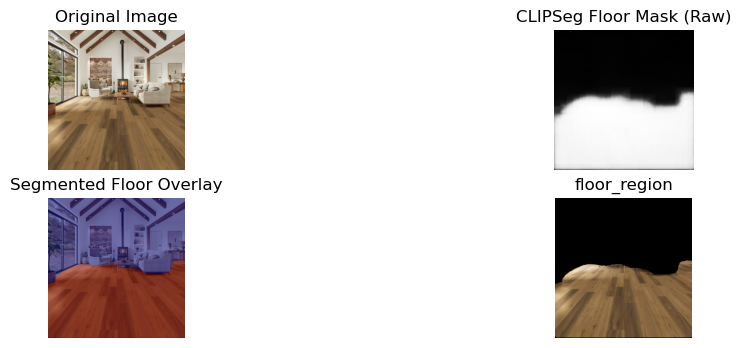

In [255]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")
model.eval()

image = Image.open("1.jpg").convert("RGB")
text_prompt = "floor"

inputs = processor(
    text=[text_prompt],
    images=image,
    return_tensors="pt"
)
with torch.no_grad():
    outputs = model(**inputs)
logits = outputs.logits 
mask = torch.sigmoid(logits)[0].cpu().numpy()

import cv2
import numpy as np

img_np = np.array(image)
h, w, _ = img_np.shape

mask_resized = cv2.resize(
    mask.astype("float32"),
    (w, h),
    interpolation=cv2.INTER_LINEAR
)
binary_mask = mask_resized > 0.5

floor_region = img_np * binary_mask[:, :, None]

# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap="gray")
plt.title("CLIPSeg Floor Mask (Raw)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(image)
plt.imshow(binary_mask, alpha=0.5, cmap="jet")
plt.title("Segmented Floor Overlay")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(floor_region)
plt.title("floor_region")
plt.axis("off")

plt.show()


Text(0.5, 1.0, 'floor_region')

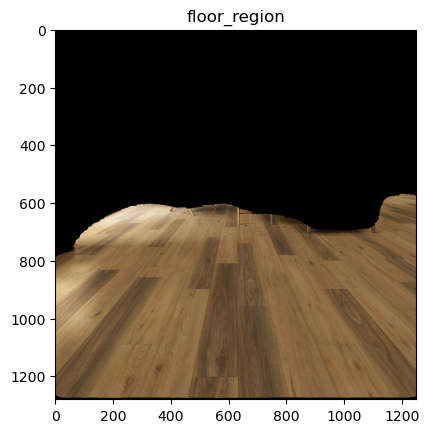

In [256]:
plt.imshow(floor_region)
plt.title("floor_region")

Text(0.5, 1.0, 'cropped_floor_region')

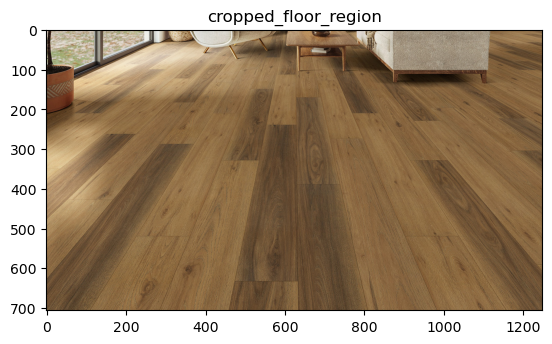

In [257]:
ys, xs = np.where(binary_mask)
crop = img_np[min(ys):max(ys), min(xs):max(xs)]
floor_img= Image.fromarray(crop)
plt.imshow(floor_img)
plt.title("cropped_floor_region")


In [258]:
import torch
import numpy as np
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

inputs = clip_processor(images=floor_img, return_tensors="pt")
with torch.no_grad():
    outputs = clip_model.get_image_features(**inputs)
q_embedding = outputs.pooler_output 
q_embedding = q_embedding / q_embedding.norm(dim=-1, keepdim=True)

print(q_embedding.shape)  # (1, 512)
print(q_embedding)


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
vision_model.embeddings.position_ids | UNEXPECTED |  | 
text_model.embeddings.position_ids   | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


torch.Size([1, 512])
tensor([[-4.0388e-02,  1.6417e-02,  1.2538e-04, -1.7797e-02,  1.5381e-02,
         -2.3066e-02,  1.4490e-02, -1.0738e-02,  1.2889e-02, -3.6173e-03,
          6.9579e-03, -1.1080e-02,  3.3288e-02, -1.0481e-02,  4.1566e-02,
          1.5517e-02,  1.2040e-02,  2.2697e-02,  2.0271e-02,  2.4165e-03,
          3.3634e-02, -1.5567e-02,  2.7642e-02,  4.0664e-02, -3.1068e-02,
          2.8534e-02,  3.3863e-02, -3.9087e-03,  2.0897e-03,  2.7208e-02,
          7.3473e-02,  6.6812e-03, -3.2876e-02, -2.7275e-02, -1.8524e-02,
          1.6194e-03,  1.4363e-02, -2.2909e-02,  1.0423e-02,  1.2279e-01,
         -2.4519e-02, -3.1849e-02,  1.4331e-02,  2.7405e-03,  4.2271e-03,
         -2.9559e-01, -3.9410e-02,  1.4157e-02, -6.4981e-02,  4.2932e-02,
         -2.4536e-02, -1.2228e-02,  5.4556e-02,  1.7298e-02, -2.5224e-02,
         -2.7507e-02, -1.1230e-02, -2.2279e-02,  3.7700e-02,  2.4608e-02,
         -1.8365e-03,  3.6055e-02, -7.0306e-03,  7.1910e-03, -3.8859e-02,
          3.1679e

In [37]:
pip install pinecone


   ---------------------------------------- 0.0/745.9 kB ? eta -:--:--
   ---------------------------------------- 745.9/745.9 kB 13.7 MB/s  0:00:00

  Attempting uninstall: packaging

    Found existing installation: packaging 25.0

    Uninstalling packaging-25.0:

      Successfully uninstalled packaging-25.0

   -------------------- ------------------- 2/4 [pinecone-plugin-assistant]
   ------------------------------ --------- 3/4 [pinecone]
   ------------------------------ --------- 3/4 [pinecone]
   ------------------------------ --------- 3/4 [pinecone]
   ------------------------------ --------- 3/4 [pinecone]
   ------------------------------ --------- 3/4 [pinecone]
   ------------------------------ --------- 3/4 [pinecone]
   ------------------------------ --------- 3/4 [pinecone]
   ------------------------------ --------- 3/4 [pinecone]
   ------------------------------ --------- 3/4 [pinecone]
   ------------------------------ --------- 3/4 [pinecone]
   ----------------

In [41]:
pip install langchain-pinecone


   ---------------------------------------- 0.0/587.6 kB ? eta -:--:--
   ---------------------------------------- 587.6/587.6 kB 8.5 MB/s  0:00:00

  Attempting uninstall: pinecone-plugin-assistant

    Found existing installation: pinecone-plugin-assistant 3.0.1

    Uninstalling pinecone-plugin-assistant-3.0.1:

      Successfully uninstalled pinecone-plugin-assistant-3.0.1

   -------- ------------------------------- 1/5 [pinecone-plugin-assistant]
  Attempting uninstall: pinecone
   -------- ------------------------------- 1/5 [pinecone-plugin-assistant]
    Found existing installation: pinecone 8.0.0
   -------- ------------------------------- 1/5 [pinecone-plugin-assistant]
   ---------------- ----------------------- 2/5 [pinecone]
    Uninstalling pinecone-8.0.0:
   ---------------- ----------------------- 2/5 [pinecone]
   ---------------- ----------------------- 2/5 [pinecone]
      Successfully uninstalled pinecone-8.0.0
   ---------------- ----------------------- 2/5 [pinec

In [259]:
q_embedding

tensor([[-4.0388e-02,  1.6417e-02,  1.2538e-04, -1.7797e-02,  1.5381e-02,
         -2.3066e-02,  1.4490e-02, -1.0738e-02,  1.2889e-02, -3.6173e-03,
          6.9579e-03, -1.1080e-02,  3.3288e-02, -1.0481e-02,  4.1566e-02,
          1.5517e-02,  1.2040e-02,  2.2697e-02,  2.0271e-02,  2.4165e-03,
          3.3634e-02, -1.5567e-02,  2.7642e-02,  4.0664e-02, -3.1068e-02,
          2.8534e-02,  3.3863e-02, -3.9087e-03,  2.0897e-03,  2.7208e-02,
          7.3473e-02,  6.6812e-03, -3.2876e-02, -2.7275e-02, -1.8524e-02,
          1.6194e-03,  1.4363e-02, -2.2909e-02,  1.0423e-02,  1.2279e-01,
         -2.4519e-02, -3.1849e-02,  1.4331e-02,  2.7405e-03,  4.2271e-03,
         -2.9559e-01, -3.9410e-02,  1.4157e-02, -6.4981e-02,  4.2932e-02,
         -2.4536e-02, -1.2228e-02,  5.4556e-02,  1.7298e-02, -2.5224e-02,
         -2.7507e-02, -1.1230e-02, -2.2279e-02,  3.7700e-02,  2.4608e-02,
         -1.8365e-03,  3.6055e-02, -7.0306e-03,  7.1910e-03, -3.8859e-02,
          3.1679e-03,  2.1873e-02, -4.

In [ ]:
from dotenv import load_dotenv
import os
from pinecone import Pinecone, ServerlessSpec
from langchain_pinecone import PineconeVectorStore

load_dotenv()

pc = Pinecone(api_key=pinecone_api_key)

index_name = "visual-similarity-check" 

if not pc.has_index(index_name):
    pc.create_index(
        name=index_name,
        dimension=512,
        metric="cosine",
        spec=ServerlessSpec(cloud="aws", region="us-east-1")
    )

index = pc.Index(index_name)


In [216]:
all_embeddings=[]
metadata=[]
ids=[]
folder_path=r"C:\Users\LENOVO\Downloads\details\Assess\sku"
for file in os.listdir(folder_path):
    if file.lower().endswith((".png", ".jpg", ".jpeg", ".webp")):
        path = os.path.join(folder_path, file)
        img = Image.open(path).convert("RGB")
        inputs = clip_processor(images=img, return_tensors="pt")
        with torch.no_grad():
            outputs = clip_model.get_image_features(**inputs)
        embedding = outputs.pooler_output 
        # Normalize embedding (important!)
        embedding = embedding / embedding.norm(dim=-1, keepdim=True)
        embedding = embedding.squeeze(0).cpu().tolist() 
        all_embeddings.append(embedding)
        meta_d={
            "name":file,
            "type": "floor",
            "material": "wood",
            "source": "clipseg"
        }
        metadata.append(meta_d)
        name = os.path.splitext(file)[0]
        ids.append(f"floor_{name}")

        
        

In [217]:
print(len(all_embeddings), len(all_embeddings[0]))

20 512


In [218]:
ids

['floor_1',
 'floor_10',
 'floor_11',
 'floor_12',
 'floor_13',
 'floor_14',
 'floor_15',
 'floor_16',
 'floor_17',
 'floor_18',
 'floor_19',
 'floor_2',
 'floor_20',
 'floor_3',
 'floor_4',
 'floor_5',
 'floor_6',
 'floor_7',
 'floor_8',
 'floor_9']

In [219]:
metadata

[{'name': '1.jpg', 'type': 'floor', 'material': 'wood', 'source': 'clipseg'},
 {'name': '10.jpg', 'type': 'floor', 'material': 'wood', 'source': 'clipseg'},
 {'name': '11.jpg', 'type': 'floor', 'material': 'wood', 'source': 'clipseg'},
 {'name': '12.jpg', 'type': 'floor', 'material': 'wood', 'source': 'clipseg'},
 {'name': '13.jpg', 'type': 'floor', 'material': 'wood', 'source': 'clipseg'},
 {'name': '14.jpg', 'type': 'floor', 'material': 'wood', 'source': 'clipseg'},
 {'name': '15.jpg', 'type': 'floor', 'material': 'wood', 'source': 'clipseg'},
 {'name': '16.jpg', 'type': 'floor', 'material': 'wood', 'source': 'clipseg'},
 {'name': '17.jpg', 'type': 'floor', 'material': 'wood', 'source': 'clipseg'},
 {'name': '18.jpg', 'type': 'floor', 'material': 'wood', 'source': 'clipseg'},
 {'name': '19.jpg', 'type': 'floor', 'material': 'wood', 'source': 'clipseg'},
 {'name': '2.jpg', 'type': 'floor', 'material': 'wood', 'source': 'clipseg'},
 {'name': '20.jpg', 'type': 'floor', 'material': 'wood

In [260]:
q_embedding = q_embedding.squeeze(0).cpu().tolist()


In [261]:
q_embedding

[-0.040388379245996475,
 0.01641717739403248,
 0.00012537669681478292,
 -0.017796609550714493,
 0.01538123656064272,
 -0.023065609857439995,
 0.014489976689219475,
 -0.010738399811089039,
 0.012888804078102112,
 -0.0036172615364193916,
 0.006957858335226774,
 -0.011080369353294373,
 0.03328845649957657,
 -0.010480580851435661,
 0.0415661446750164,
 0.015516855753958225,
 0.012040020897984505,
 0.022697284817695618,
 0.02027142606675625,
 0.0024165483191609383,
 0.0336335226893425,
 -0.015567080117762089,
 0.027642078697681427,
 0.04066447913646698,
 -0.031067846342921257,
 0.028534207493066788,
 0.033863019198179245,
 -0.003908735699951649,
 0.0020897143986076117,
 0.02720773220062256,
 0.07347268611192703,
 0.006681227125227451,
 -0.03287561610341072,
 -0.027275383472442627,
 -0.01852428913116455,
 0.001619432121515274,
 0.014362758025527,
 -0.02290891669690609,
 0.010423065163195133,
 0.12279386073350906,
 -0.02451864629983902,
 -0.03184853121638298,
 0.014330863021314144,
 0.0027404

In [220]:
index.upsert([
    {
        "id": ids[i],
        "values": all_embeddings[i],
        "metadata": metadata[i]
    }
    for i in range(len(all_embeddings))
])

UpsertResponse(upserted_count=20, _response_info={'raw_headers': {'date': 'Sun, 01 Feb 2026 17:29:02 GMT', 'content-type': 'application/json', 'content-length': '20', 'connection': 'keep-alive', 'x-pinecone-request-lsn': '1', 'x-pinecone-request-logical-size': '42622', 'x-pinecone-request-latency-ms': '1821', 'x-pinecone-request-id': '6326578899586255910', 'x-envoy-upstream-service-time': '264', 'x-pinecone-response-duration-ms': '1823', 'grpc-status': '0', 'server': 'envoy'}})

In [262]:
len(q_embedding)

512

In [263]:
results = index.query(
    vector=q_embedding,
    top_k=20,
    include_metadata=True, 
)
results

QueryResponse(matches=[{'id': 'floor_14',
 'metadata': {'material': 'wood',
              'name': '14.jpg',
              'source': 'clipseg',
              'type': 'floor'},
 'score': 0.9221192,
 'values': []}, {'id': 'floor_6',
 'metadata': {'material': 'wood',
              'name': '6.jpg',
              'source': 'clipseg',
              'type': 'floor'},
 'score': 0.905243039,
 'values': []}, {'id': 'floor_4',
 'metadata': {'material': 'wood',
              'name': '4.jpg',
              'source': 'clipseg',
              'type': 'floor'},
 'score': 0.902481139,
 'values': []}, {'id': 'floor_13',
 'metadata': {'material': 'wood',
              'name': '13.jpg',
              'source': 'clipseg',
              'type': 'floor'},
 'score': 0.899810851,
 'values': []}, {'id': 'floor_9',
 'metadata': {'material': 'wood',
              'name': '9.jpg',
              'source': 'clipseg',
              'type': 'floor'},
 'score': 0.896606684,
 'values': []}, {'id': 'floor_19',
 'metadata'

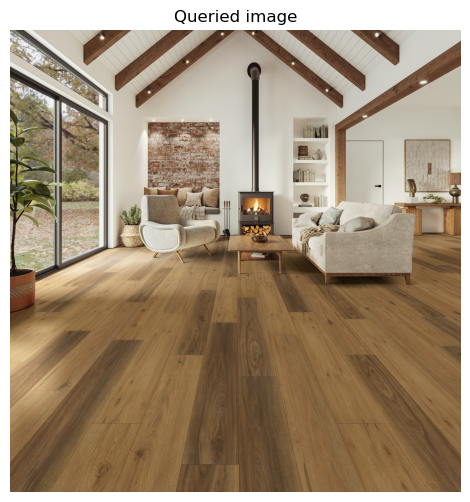

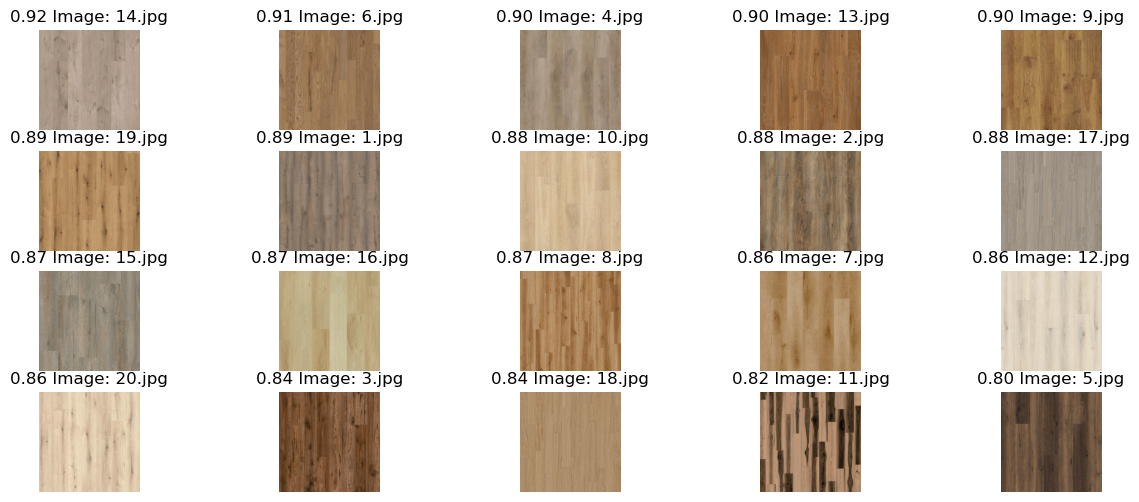

In [264]:
from PIL import Image
import matplotlib.pyplot as plt

IMAGE_DIR = r"C:\Users\LENOVO\Downloads\details\Assess\sku"

plt.figure(figsize=(15, 6))
q_img = Image.open(r"C:\Users\LENOVO\Downloads\details\Assess\query\1.jpg")
plt.imshow(q_img)
plt.axis("off")
plt.title("Queried image")
plt.figure(figsize=(15, 6))
for i, match in enumerate(results.matches[:20]):
    img_path = os.path.join(IMAGE_DIR, match["metadata"]["name"])
    img = Image.open(img_path)

    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{match['score']:.2f} Image: {match['metadata']['name']}")


plt.show()

In [179]:
def clip_pairwise_similarity(query_img, candidate_img):
    inputs = clip_processor(
        images=[query_img, candidate_img],
        return_tensors="pt"
    )

    with torch.no_grad():
        features = clip_model.get_image_features(**inputs)
        features = features.pooler_output 

    features = features / features.norm(dim=-1, keepdim=True)

    # cosine similarity
    similarity = torch.matmul(features[0], features[1].T)
    return similarity.item()

In [180]:
def semantic_retrieval(embedding, top_k=10):
    results = index.query(
        vector=embedding,
        top_k=top_k,
        include_metadata=True
    )
    return results["matches"]

In [181]:
def hybrid_image_search(query_img, query_embedding, image_base_path, top_k=40):
    # Stage 1: Semantic search
    candidates = semantic_retrieval(query_embedding, top_k)

    reranked = []

    for match in candidates:
        img_name = match["metadata"]["name"]
        candidate_path = os.path.join(image_base_path, img_name)
        candidate_img = Image.open(candidate_path).convert("RGB")

        score = clip_pairwise_similarity(query_img, candidate_img)

        reranked.append({
            "id": match["id"],
            "image_name": img_name,
            "semantic_score": match["score"],
            "hybrid_score": score
        })

    # Stage 2: Re-rank
    reranked.sort(key=lambda x: x["hybrid_score"], reverse=True)

    return reranked

In [265]:
dir=r"C:\Users\LENOVO\sku"
reranked=hybrid_image_search(floor_img,q_embedding,dir)
reranked


[{'id': 'floor_14',
  'image_name': '14.jpg',
  'semantic_score': 0.9221192,
  'hybrid_score': 0.9224719405174255},
 {'id': 'floor_6',
  'image_name': '6.jpg',
  'semantic_score': 0.905243039,
  'hybrid_score': 0.9047542810440063},
 {'id': 'floor_4',
  'image_name': '4.jpg',
  'semantic_score': 0.902481139,
  'hybrid_score': 0.9012202024459839},
 {'id': 'floor_13',
  'image_name': '13.jpg',
  'semantic_score': 0.899810851,
  'hybrid_score': 0.9002580642700195},
 {'id': 'floor_9',
  'image_name': '9.jpg',
  'semantic_score': 0.896606684,
  'hybrid_score': 0.8964322209358215},
 {'id': 'floor_19',
  'image_name': '19.jpg',
  'semantic_score': 0.893371701,
  'hybrid_score': 0.8927325010299683},
 {'id': 'floor_1',
  'image_name': '1.jpg',
  'semantic_score': 0.891952574,
  'hybrid_score': 0.8922542333602905},
 {'id': 'floor_10',
  'image_name': '10.jpg',
  'semantic_score': 0.884185851,
  'hybrid_score': 0.8838531970977783},
 {'id': 'floor_2',
  'image_name': '2.jpg',
  'semantic_score': 0.

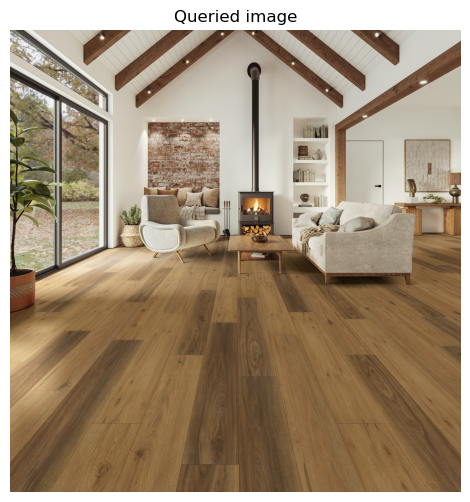

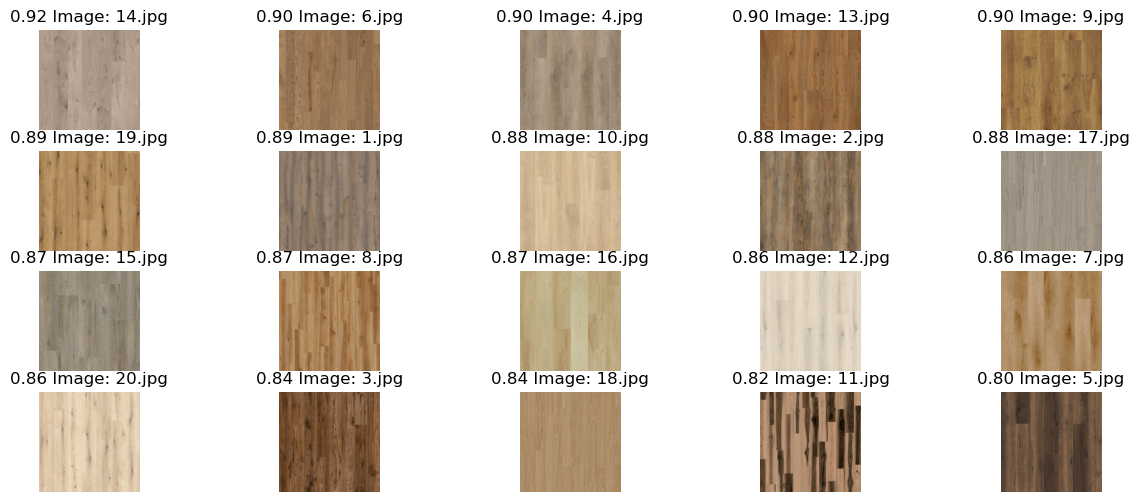

In [266]:
from PIL import Image
import matplotlib.pyplot as plt

IMAGE_DIR = r"C:\Users\LENOVO\Downloads\details\Assess\sku"

plt.figure(figsize=(15, 6))
q_img = Image.open(r"C:\Users\LENOVO\Downloads\details\Assess\query\1.jpg")
plt.imshow(q_img)
plt.axis("off")
plt.title("Queried image")
plt.figure(figsize=(15, 6))
for i, match in enumerate(reranked):
    img_path = os.path.join(IMAGE_DIR, match["image_name"])
    img = Image.open(img_path)

    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{match['hybrid_score']:.2f} Image: {match['image_name']}")


plt.show()